**Pickl.AI's Extensive Internship Program 2023**

**INTERNSHIP PROJECT – USED CAR PRICE PREDICTION USING MACHINE LEARNING**

**Name - Sakshi Bidwai | Batch - D**

# **Importing Libraries & Dataset**

### **Importing Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

### **Importing Dataset:**

In [2]:
df = pd.read_csv('/content/Dataset_car_price_prediction.csv')

# **Day_3-4 Data Cleaning**

Preprocess & clean the data, Finding missing values, Finding outliers

### **Basic Observations:**

In [3]:
df.head()

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,Oct_2006,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0
1,Oct_2006,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0
2,Sept_2006,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0
3,Jul_2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0
4,Mar_2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0


In [4]:
df.describe()

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
count,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.000000
mean,72645.248607,101.502089,1576.85585,4.033426,4.0,5.026462,0.300139,11374.681755
std,39756.831763,14.981080,424.38677,0.952677,0.0,0.188510,0.458478,3844.583866
min,1.000000,69.000000,1300.00000,2.000000,4.0,3.000000,0.000000,4611.000000
25%,45580.000000,90.000000,1400.00000,3.000000,4.0,5.000000,0.000000,8957.000000
50%,67193.000000,110.000000,1600.00000,4.000000,4.0,5.000000,0.000000,10494.000000
75%,92242.000000,110.000000,1600.00000,5.000000,4.0,5.000000,1.000000,12667.000000
max,257580.000000,192.000000,16000.00000,5.000000,4.0,6.000000,1.000000,34450.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mon_year       1436 non-null   object 
 1   KM_driven      1436 non-null   float64
 2   Fuel_Type      1436 non-null   object 
 3   Horse_Power    1436 non-null   int64  
 4   Color          1436 non-null   object 
 5   Transmission   1436 non-null   object 
 6   Engine         1436 non-null   int64  
 7   Doors          1436 non-null   int64  
 8   Cylinders      1436 non-null   int64  
 9   Gears          1436 non-null   int64  
 10  Sport_Model    1436 non-null   int64  
 11  selling_price  1436 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 134.8+ KB


In [6]:
df.isnull().sum()

mon_year         0
KM_driven        0
Fuel_Type        0
Horse_Power      0
Color            0
Transmission     0
Engine           0
Doors            0
Cylinders        0
Gears            0
Sport_Model      0
selling_price    0
dtype: int64

As we can see here there are no missing values present in the given dataset.

### **Data Cleaning:**

Here, We are separating the month and year from the "mon_year" feature form the given dataset.

In [7]:
df[['Month', 'Year']] = df['mon_year'].str.split('_', expand=True)
df.drop(columns=['mon_year'], inplace=True)

In [8]:
df.head()

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,Month,Year
0,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0,Oct,2006
1,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0,Oct,2006
2,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0,Sept,2006
3,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0,Jul,2006
4,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0,Mar,2006


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KM_driven      1436 non-null   float64
 1   Fuel_Type      1436 non-null   object 
 2   Horse_Power    1436 non-null   int64  
 3   Color          1436 non-null   object 
 4   Transmission   1436 non-null   object 
 5   Engine         1436 non-null   int64  
 6   Doors          1436 non-null   int64  
 7   Cylinders      1436 non-null   int64  
 8   Gears          1436 non-null   int64  
 9   Sport_Model    1436 non-null   int64  
 10  selling_price  1436 non-null   float64
 11  Month          1436 non-null   object 
 12  Year           1436 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 146.0+ KB


Checking the caridinality of the Categorical Features to which will help to select the correct encoding scheme.

In [10]:
categorical_columns = ['Fuel_Type', 'Color', 'Transmission', 'Month']

cardinality_dict = {}

for col in categorical_columns:
    cardinality_dict[col] = len(df[col].unique())

print(cardinality_dict)

{'Fuel_Type': 3, 'Color': 2, 'Transmission': 2, 'Month': 12}


### **Detecting Outliers:**

Checking the Unique values of all features which helps in selecting the features to detect the outliers.

In [11]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}' has {len(unique_values)} unique values:")
    print(unique_values)
    print()

Column 'KM_driven' has 1263 unique values:
[49805. 77313. 44214. ... 20140. 18037. 17931.]

Column 'Fuel_Type' has 3 unique values:
['Diesel' 'Petrol' 'CNG']

Column 'Horse_Power' has 12 unique values:
[ 90 192  69 110  97  71 116  98  86  72 107  73]

Column 'Color' has 2 unique values:
['Metallic' 'Non-Metallic']

Column 'Transmission' has 2 unique values:
['Manual' 'Automatic']

Column 'Engine' has 13 unique values:
[ 2000  1800  1900  1600  1400  1598 16000  1995  1398  1300  1587  1975
  1332]

Column 'Doors' has 4 unique values:
[3 5 4 2]

Column 'Cylinders' has 1 unique values:
[4]

Column 'Gears' has 4 unique values:
[5 6 3 4]

Column 'Sport_Model' has 2 unique values:
[0 1]

Column 'selling_price' has 236 unique values:
[14310. 14575. 14787. 15847. 13727. 17914. 19716. 22790. 22207. 21147.
 20776. 23850. 23320. 24115. 19027. 17755. 17967. 16907. 17225. 18545.
 16695. 16430. 15635. 20140. 16748. 23267. 21730. 14045. 16165. 20087.
 16959. 17490. 19875. 23585. 13775. 19557. 17909

Detecting the outliers in the **KM_driven, Engine, selling_price** features.

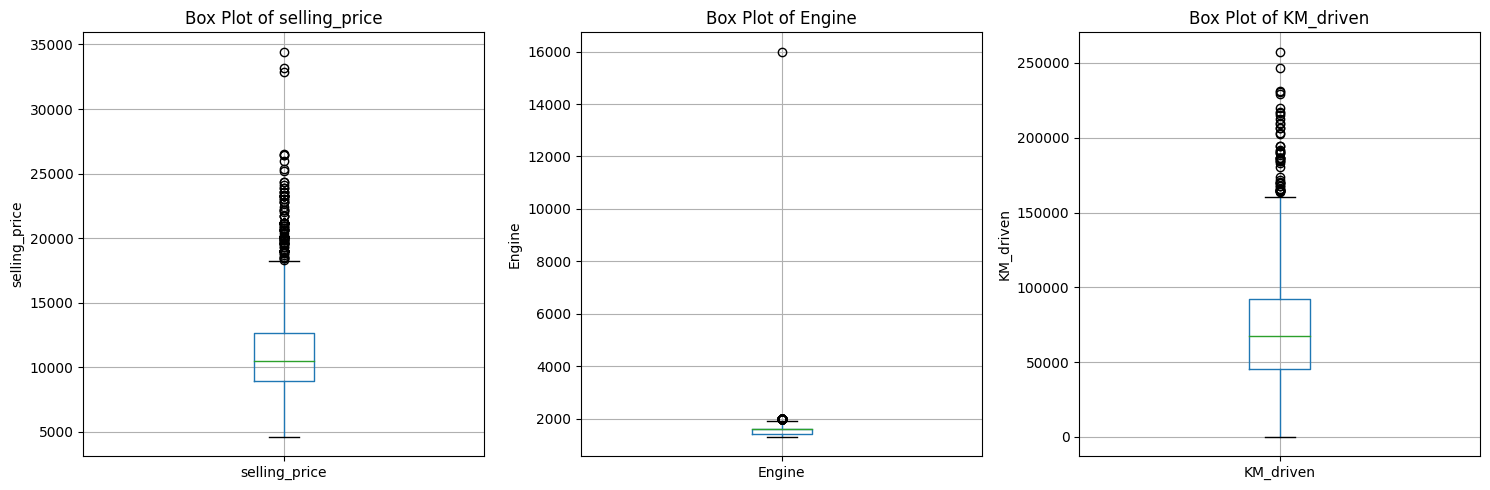

In [12]:
columns_to_detect_outliers = ['selling_price', 'Engine', 'KM_driven']

fig, axes = plt.subplots(1, len(columns_to_detect_outliers), figsize=(15, 5))

for i, col in enumerate(columns_to_detect_outliers):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### **Outlier Handling:**

Checking and Visualizing the distribution of data in the **KM_driven, Engine, selling_price** features which helps in selecting the appropriate outlier handling method.

In [13]:
numerical_columns = ['selling_price', 'Engine', 'KM_driven']

for column in numerical_columns:
    print(f"Summary for '{column}':")
    print(df[column].describe())
    print("\n")

Summary for 'selling_price':
count     1436.000000
mean     11374.681755
std       3844.583866
min       4611.000000
25%       8957.000000
50%      10494.000000
75%      12667.000000
max      34450.000000
Name: selling_price, dtype: float64


Summary for 'Engine':
count     1436.00000
mean      1576.85585
std        424.38677
min       1300.00000
25%       1400.00000
50%       1600.00000
75%       1600.00000
max      16000.00000
Name: Engine, dtype: float64


Summary for 'KM_driven':
count      1436.000000
mean      72645.248607
std       39756.831763
min           1.000000
25%       45580.000000
50%       67193.000000
75%       92242.000000
max      257580.000000
Name: KM_driven, dtype: float64




<ipython-input-14-12ca5b6396cf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
<ipython-input-14-12ca5b6396cf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
<ipython-input-14-12ca5b6396cf>:6: UserWarning: 

`distplot` is a deprecated functio

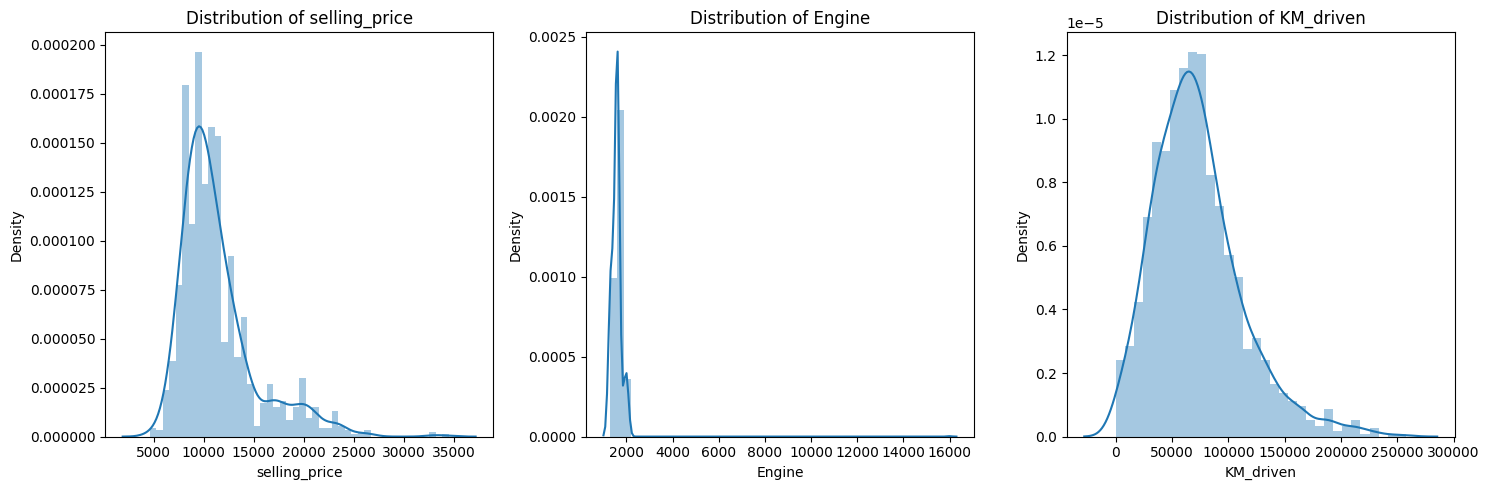

In [14]:
features_to_visualize = ['selling_price', 'Engine', 'KM_driven']

fig, axes = plt.subplots(1, len(features_to_visualize), figsize=(15, 5))

for i, feature in enumerate(features_to_visualize):
    sns.distplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

From the above observations it is found that the data of all the features is not distributed normally, it is skewed or has heavy tails, making the Z-Score Method less suitable.

Hence, We are using the IQR Method and Capping as our data is skewed or has heavy . IQR is robust to extreme values and works better with non-normal distributions.

In [15]:
# Function to handle outliers using IQR method
# def handle_outliers_iqr(data, col):
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Function to handle outliers using IQR method and capping
def handle_outliers_iqr_capping(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower_bound, upper_bound)
    return data

columns_to_handle_outliers = ['KM_driven', 'Engine', 'selling_price']

for col in columns_to_handle_outliers:
    df = handle_outliers_iqr_capping(df, col)

After handling outliers, we are reevaluating the presence of outliers in the **selling_price**, **Engine**, and **KM_driven**.

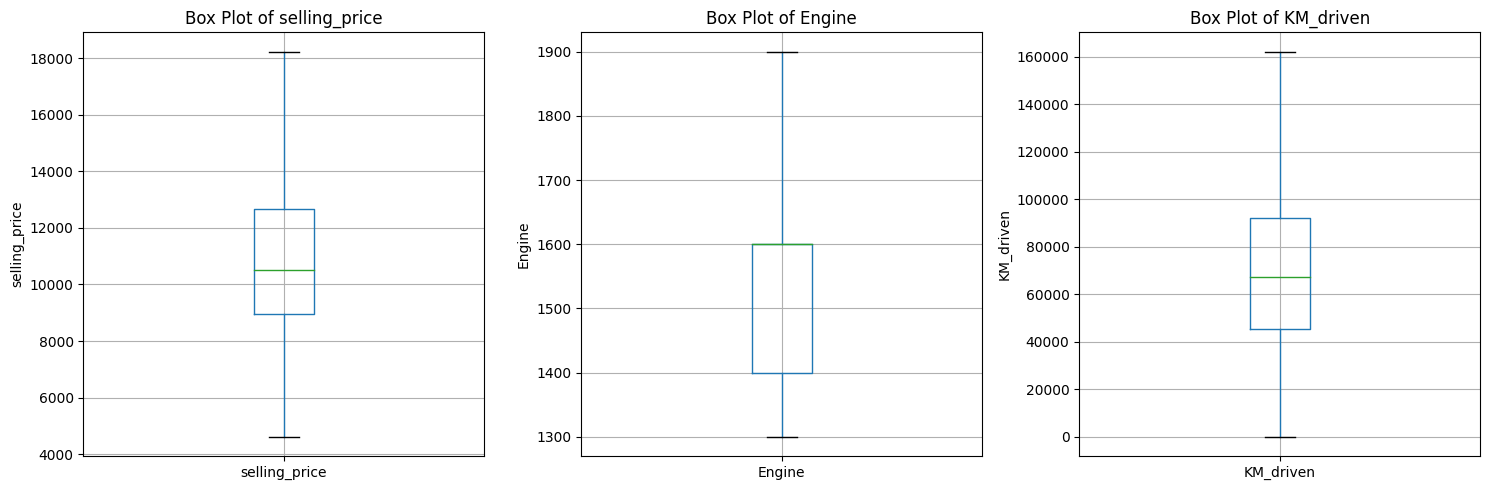

In [16]:
columns_to_detect_outliers = ['selling_price', 'Engine', 'KM_driven']

fig, axes = plt.subplots(1, len(columns_to_detect_outliers), figsize=(15, 5))

for i, col in enumerate(columns_to_detect_outliers):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Here, We have done the Data Cleaning and Outlier Handling to ensure that the dataset is preprocessed and cleaned.

# **Day_5 Data Exploration**

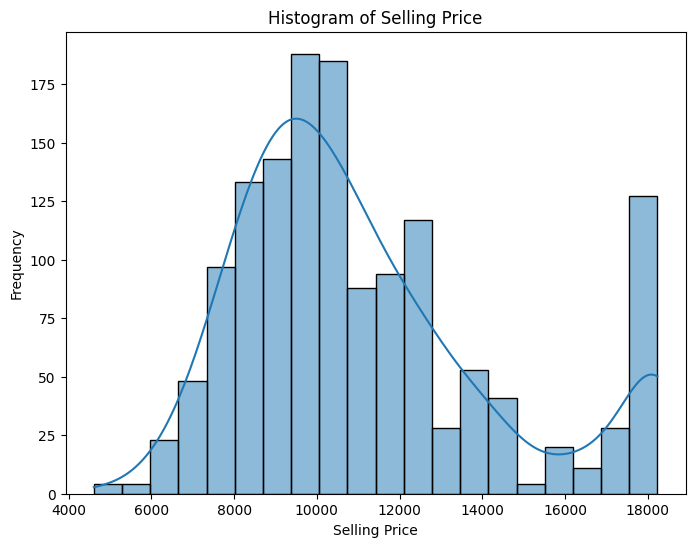

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['selling_price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Histogram of Selling Price')
plt.show()

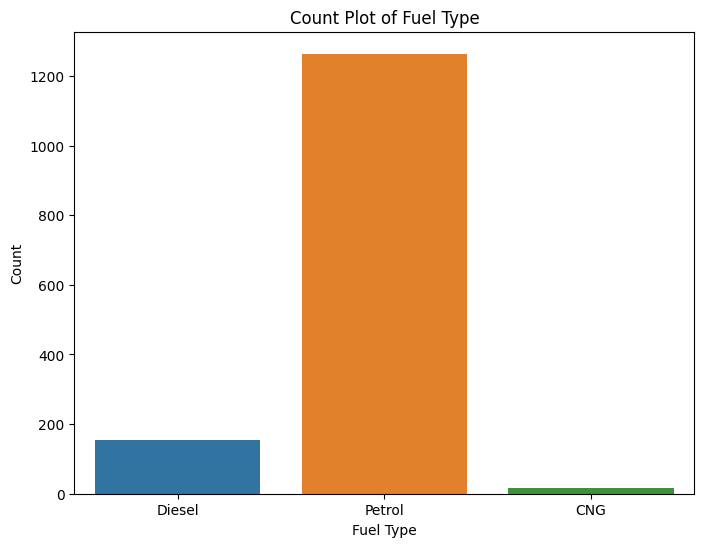

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count Plot of Fuel Type')
plt.show()

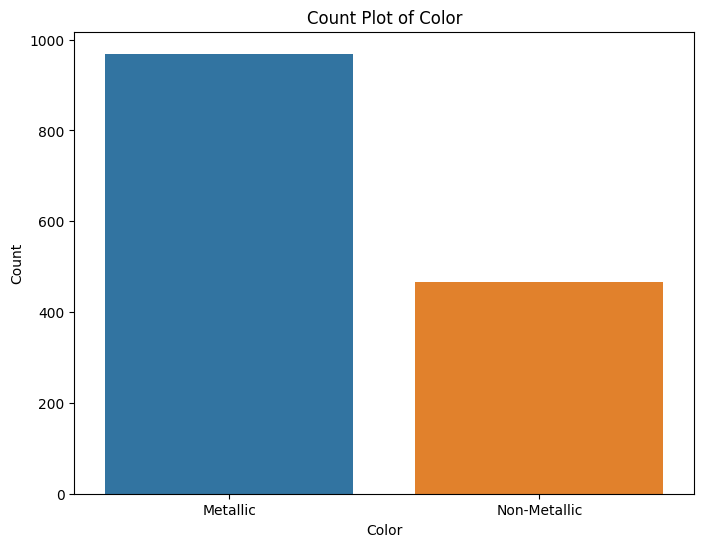

In [19]:
# Count plot for Color
plt.figure(figsize=(8, 6))
sns.countplot(x='Color', data=df)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count Plot of Color')
plt.show()

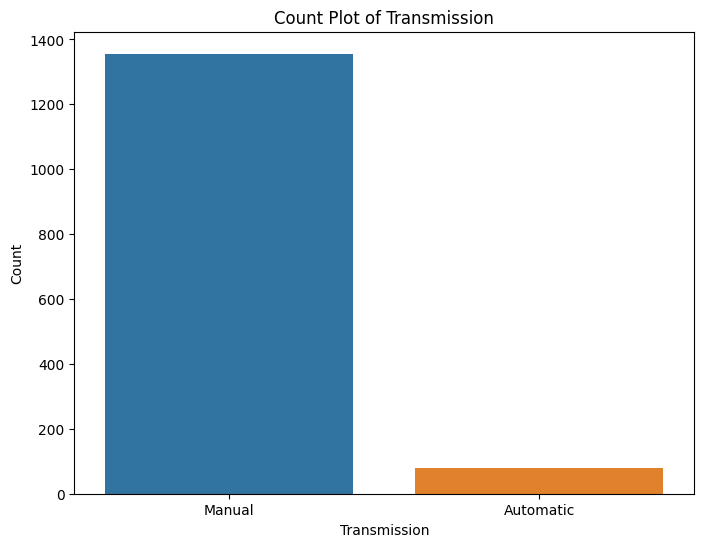

In [20]:
# Count plot for Transmission
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df)
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Count Plot of Transmission')
plt.show()

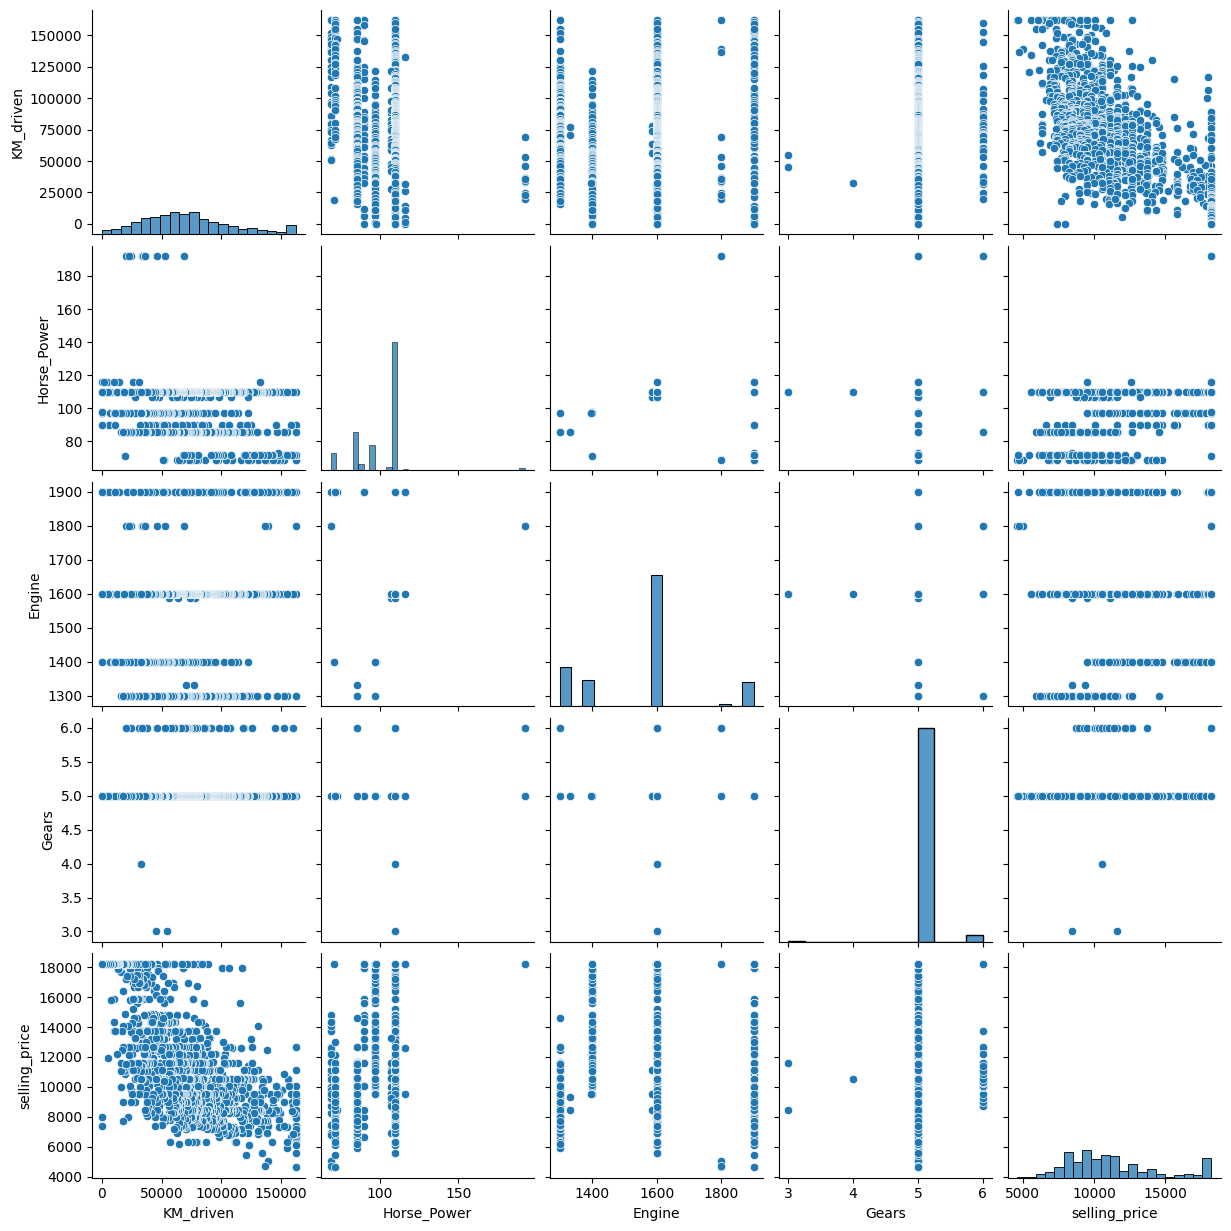

In [22]:
# Pair plot for selected numerical features
selected_features = ['KM_driven', 'Horse_Power', 'Engine', 'Gears', 'selling_price']
sns.pairplot(df[selected_features])
plt.show()


# **Day_6 Data Preparation**

This is the update regarding the Day_6 Data Preparation.

On the given dataset, I have performed the Data Preprocessing, Cleaning and Data Exploration.

Now, the Data is well prepared for the model traing but before moving towards model traing part we have to perform some Feature Engineering.

Feature Engineering the task of the Day-7.

In [23]:
df.head(10)

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,Month,Year
0,49805.0,Diesel,90,Metallic,Manual,1900,3,4,5,0,14310.0,Oct,2006
1,77313.0,Diesel,90,Metallic,Manual,1900,3,4,5,0,14575.0,Oct,2006
2,44214.0,Diesel,90,Metallic,Manual,1900,3,4,5,0,14787.0,Sept,2006
3,50880.0,Diesel,90,Non-Metallic,Manual,1900,3,4,5,0,15847.0,Jul,2006
4,40810.0,Diesel,90,Non-Metallic,Manual,1900,3,4,5,0,14575.0,Mar,2006
5,64660.0,Diesel,90,Non-Metallic,Manual,1900,3,4,5,0,13727.0,Jan,2006
6,100289.0,Diesel,90,Metallic,Manual,1900,3,4,5,1,17914.0,Jun,2006
7,80442.0,Diesel,90,Metallic,Manual,1900,3,4,5,0,18232.0,Mar,2006
8,20882.0,Petrol,192,Non-Metallic,Manual,1800,3,4,5,0,18232.0,Jun,2006
9,75406.0,Diesel,69,Non-Metallic,Manual,1900,3,4,5,0,13727.0,Oct,2006


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KM_driven      1436 non-null   float64
 1   Fuel_Type      1436 non-null   object 
 2   Horse_Power    1436 non-null   int64  
 3   Color          1436 non-null   object 
 4   Transmission   1436 non-null   object 
 5   Engine         1436 non-null   int64  
 6   Doors          1436 non-null   int64  
 7   Cylinders      1436 non-null   int64  
 8   Gears          1436 non-null   int64  
 9   Sport_Model    1436 non-null   int64  
 10  selling_price  1436 non-null   float64
 11  Month          1436 non-null   object 
 12  Year           1436 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 146.0+ KB


In [25]:
df.describe()

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.000000,1436.000000
mean,71661.158774,101.502089,1558.565460,4.033426,4.0,5.026462,0.300139,11130.678273
std,36822.906558,14.981080,168.970222,0.952677,0.0,0.188510,0.458478,3160.723166
min,1.000000,69.000000,1300.000000,2.000000,4.0,3.000000,0.000000,4611.000000
25%,45580.000000,90.000000,1400.000000,3.000000,4.0,5.000000,0.000000,8957.000000
50%,67193.000000,110.000000,1600.000000,4.000000,4.0,5.000000,0.000000,10494.000000
75%,92242.000000,110.000000,1600.000000,5.000000,4.0,5.000000,1.000000,12667.000000
max,162235.000000,192.000000,1900.000000,5.000000,4.0,6.000000,1.000000,18232.000000


As we have checked now the data is well prepared for machine learning models but the some feature engineering is yet to be performed.

# **Day_7-8 Feature Engineering**

### **Label Encoding:**

Lable Encoding on the categorical features - **Fuel_Type, Color, Transmission, Month**.


In [26]:
categorical_columns = ['Fuel_Type', 'Color', 'Transmission', 'Month']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

### **Feature Scaling:**

Feature Scaling on the categorical features - **KM_driven, Horse_Power, Engine, Year**.

In [27]:
numerical_columns = ['KM_driven', 'Horse_Power', 'Engine', 'Year']

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

**Let's take a last look at the dataset, before we start training the models.**

In [28]:
df.head()

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,Month,Year
0,-0.593755,1,-0.768042,0,1,2.021383,3,4,5,0,14310.0,10,1.541796
1,0.153541,1,-0.768042,0,1,2.021383,3,4,5,0,14575.0,10,1.541796
2,-0.745642,1,-0.768042,0,1,2.021383,3,4,5,0,14787.0,11,1.541796
3,-0.564551,1,-0.768042,1,1,2.021383,3,4,5,0,15847.0,5,1.541796
4,-0.838117,1,-0.768042,1,1,2.021383,3,4,5,0,14575.0,7,1.541796


# **Day_9-10 Model Selection and Training**

### **Dataset Splitting:**

In [29]:
X = df.drop(columns=["selling_price"])
y = df["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### **Model Training:**

In [30]:
# 1. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Train Support Vector Machines (SVM) with RBF kernel
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

# 3. Train Linear SVR
linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)

# 4. Train Neural Network MLP Regressor
mlp = MLPRegressor(random_state=40)
mlp.fit(X_train, y_train)

# 5. Train Stochastic Gradie nt Descent (SGD) Regressor
sgd = SGDRegressor(random_state=40)
sgd.fit(X_train, y_train)

# 6. Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=40)
dt.fit(X_train, y_train)

# 7. Train Random Forest
rf = RandomForestRegressor(random_state=40)
rf.fit(X_train, y_train)

# 8. Train XGBoost (XGB) Regressor
xgb = XGBRegressor(random_state=40)
xgb.fit(X_train, y_train)

# 9. Train LightGBM (LGBM) Regressor
lgbm = LGBMRegressor(random_state=40)
lgbm.fit(X_train, y_train)

# 10. Train GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=40)
gb.fit(X_train, y_train)

# 11. Train Ridge Regressor
ridge = Ridge(alpha=1.0, random_state=40)
ridge.fit(X_train, y_train)

# 12. Train Bagging Regressor
bagging = BaggingRegressor(random_state=40)
bagging.fit(X_train, y_train)

# 13. Train Extra Trees Regressor
extra_trees = ExtraTreesRegressor(random_state=40)
extra_trees.fit(X_train, y_train)

# 14. Train AdaBoost Regressor
ada_boost = AdaBoostRegressor(random_state=40)
ada_boost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AdaBoostRegressor(random_state=40)

# **Day_11-12 Model Evaluation and Validation**

### **Getting Predictions:**

Getting predictions for each model.

In [31]:
# 1. Linear Regression
y_pred_lr = lr.predict(X_test)

# 2. Support Vector Machines (SVM) with RBF kernel
y_pred_svm = svm.predict(X_test)

# 3. Linear SVR
y_pred_linear_svr = linear_svr.predict(X_test)

# 4. Neural Network MLP Regressor
y_pred_mlp = mlp.predict(X_test)

# 5. Stochastic Gradient Descent (SGD) Regressor
y_pred_sgd = sgd.predict(X_test)

# 6. Decision Tree Regressor
y_pred_dt = dt.predict(X_test)

# 7. Random Forest
y_pred_rf = rf.predict(X_test)

# 8. XGBoost (XGB) Regressor
y_pred_xgb = xgb.predict(X_test)

# 9. LightGBM (LGBM) Regressor
y_pred_lgbm = lgbm.predict(X_test)

# 10. GradientBoostingRegressor
y_pred_gb = gb.predict(X_test)

# 11. Ridge Regressor
y_pred_ridge = ridge.predict(X_test)

# 12. Bagging Regressor
y_pred_bagging = bagging.predict(X_test)

# 13. Extra Trees Regressor
y_pred_extra_trees = extra_trees.predict(X_test)

# 14. AdaBoost Regressor
y_pred_ada_boost = ada_boost.predict(X_test)

### **Model Evaluation:**

In [32]:
models = ['Linear Regression', 'Support Vector Machines', 'Linear SVR', 'MLPRegressor', 'Stochastic Gradient Descent',
          'Decision Tree Regressor', 'Random Forest', 'XGBoost', 'LGBM', 'GradientBoostingRegressor', 'Ridge Regressor',
          'Bagging Regressor', 'Extra Trees Regressor', 'AdaBoost Regressor']

predictions = [y_pred_lr, y_pred_svm, y_pred_linear_svr, y_pred_mlp, y_pred_sgd,
               y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_lgbm, y_pred_gb,
               y_pred_ridge, y_pred_bagging, y_pred_extra_trees, y_pred_ada_boost]

metrics = {
    'Model': models,
    'Mean Squared Error': [mean_squared_error(y_test, pred) for pred in predictions],
    'Root Mean Squared Error': [mean_squared_error(y_test, pred, squared=False) for pred in predictions],
    'Mean Absolute Error': [mean_absolute_error(y_test, pred) for pred in predictions],
    'R-squared (R^2)': [r2_score(y_test, pred) for pred in predictions],
    'Explained Variance Score': [explained_variance_score(y_test, pred) for pred in predictions]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                          Model  Mean Squared Error  Root Mean Squared Error  \
0             Linear Regression        1.525120e+06              1234.957348   
1       Support Vector Machines        9.604051e+06              3099.040283   
2                    Linear SVR        5.439262e+06              2332.222446   
3                  MLPRegressor        5.213460e+07              7220.429576   
4   Stochastic Gradient Descent        1.686774e+06              1298.758564   
5       Decision Tree Regressor        2.160053e+06              1469.711786   
6                 Random Forest        1.230212e+06              1109.149060   
7                       XGBoost        1.337281e+06              1156.408534   
8                          LGBM        1.147446e+06              1071.188849   
9     GradientBoostingRegressor        1.178857e+06              1085.751986   
10              Ridge Regressor        1.524179e+06              1234.576257   
11            Bagging Regressor        1

### **Best Model:**

As per the above observations the **LightGBM (LGBM) Regressor Model** is performing well.

In [33]:
print("LightGBM (LGBM) Regressor:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lgbm))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lgbm))
print("R-squared (R^2):", r2_score(y_test, y_pred_lgbm))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred_lgbm))

LightGBM (LGBM) Regressor:
Mean Squared Error (MSE): 1147445.5507045384
Root Mean Squared Error (RMSE): 1071.1888492252608
Mean Absolute Error (MAE): 825.2412407948539
R-squared (R^2): 0.8796100228419649
Explained Variance Score: 0.8801529015925742


# **Day_13 Model Tuning**

### **Hyperparameter Tuning:**

In [34]:
lgbm = LGBMRegressor(random_state=40)

# Defining hyperparameter grid for Randomized Search
param_distributions = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': np.arange(3, 11),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

# Performing Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Using negative MSE for optimization
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Now, Fittig the Randomized Search to find the best hyperparameters
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=40), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='neg_mean_squared_error')

### **Best Parameters:**

In [35]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


### **Creating Model with Best Parameters**:

In [36]:
best_lgbm = LGBMRegressor(**best_params, random_state=40)

### **Training Model:**

In [37]:
best_lgbm.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.7, max_depth=5, random_state=40, subsample=0.6)

### **Making Predictions:**

In [38]:
y_pred_lgbm_tuned = best_lgbm.predict(X_test)

# **Day_14 Finalizing Result**

In [39]:
mse_tuned = mean_squared_error(y_test, y_pred_lgbm_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_lgbm_tuned)
r_squared_tuned = r2_score(y_test, y_pred_lgbm_tuned)
explained_var_score_tuned = explained_variance_score(y_test, y_pred_lgbm_tuned)

print("Tuned LightGBM Regressor Metrics:")
print("Mean Squared Error (MSE):", mse_tuned)
print("Root Mean Squared Error (RMSE):", rmse_tuned)
print("Mean Absolute Error (MAE):", mae_tuned)
print("R-squared (R^2):", r_squared_tuned)
print("Explained Variance Score:", explained_var_score_tuned)

Tuned LightGBM Regressor Metrics:
Mean Squared Error (MSE): 1126745.4294189918
Root Mean Squared Error (RMSE): 1061.4826562026306
Mean Absolute Error (MAE): 817.0459403295429
R-squared (R^2): 0.8817818793864478
Explained Variance Score: 0.8820163904841067


After Model Tuning the performance of LightGBM Regressor Model is improved. This is the Finalized Result.